In [ ]:
# Assignment to use Neural Network deep learning on heart failure dataset 
# Steps: Data preprocessing, cleaning, vectorize, correlation check, handling outliers(scaler), visualisation, 
#        data splitting, train & test model, test accuracy etc, plot accuracy, deploy on streamlite 

# Importing all necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import klib

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Loading the datasets. 

df = pd.read_csv("heart.csv")  

# Getting info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Split numerical-categorical Features
numerical_col = df.select_dtypes(exclude=np.object_)
categorical_col = df.select_dtypes(exclude=np.number)

In [ ]:
Mis_features=['age','platelets']
df[Mis_features] = df[Mis_features].astype(int)

df.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int32
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
# EDA / Exploratory Data Analysis
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1.90,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.10,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.30,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.90,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.70,116,0,0,8,1


In [ ]:
df.describe().round(2).style.background_gradient()

#32% of people died 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.830000,0.430000,581.840000,0.420000,38.080000,0.350000,263358.030000,1.390000,136.630000,0.650000,0.320000,130.260000,0.320000
std,11.890000,0.500000,970.290000,0.490000,11.830000,0.480000,97804.240000,1.030000,4.410000,0.480000,0.470000,77.610000,0.470000
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [ ]:
# No missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.columns.values
# google info to understand these clinical terms meanings and heart failure 

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'], dtype=object)

In [ ]:
# use klib to clean data. to reduce memory, so that it helps when computing codes for visualisation.

cleaned_df = klib.data_cleaning(df)

Shape of cleaned data: (299, 13) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.02 MB (-66.67%)



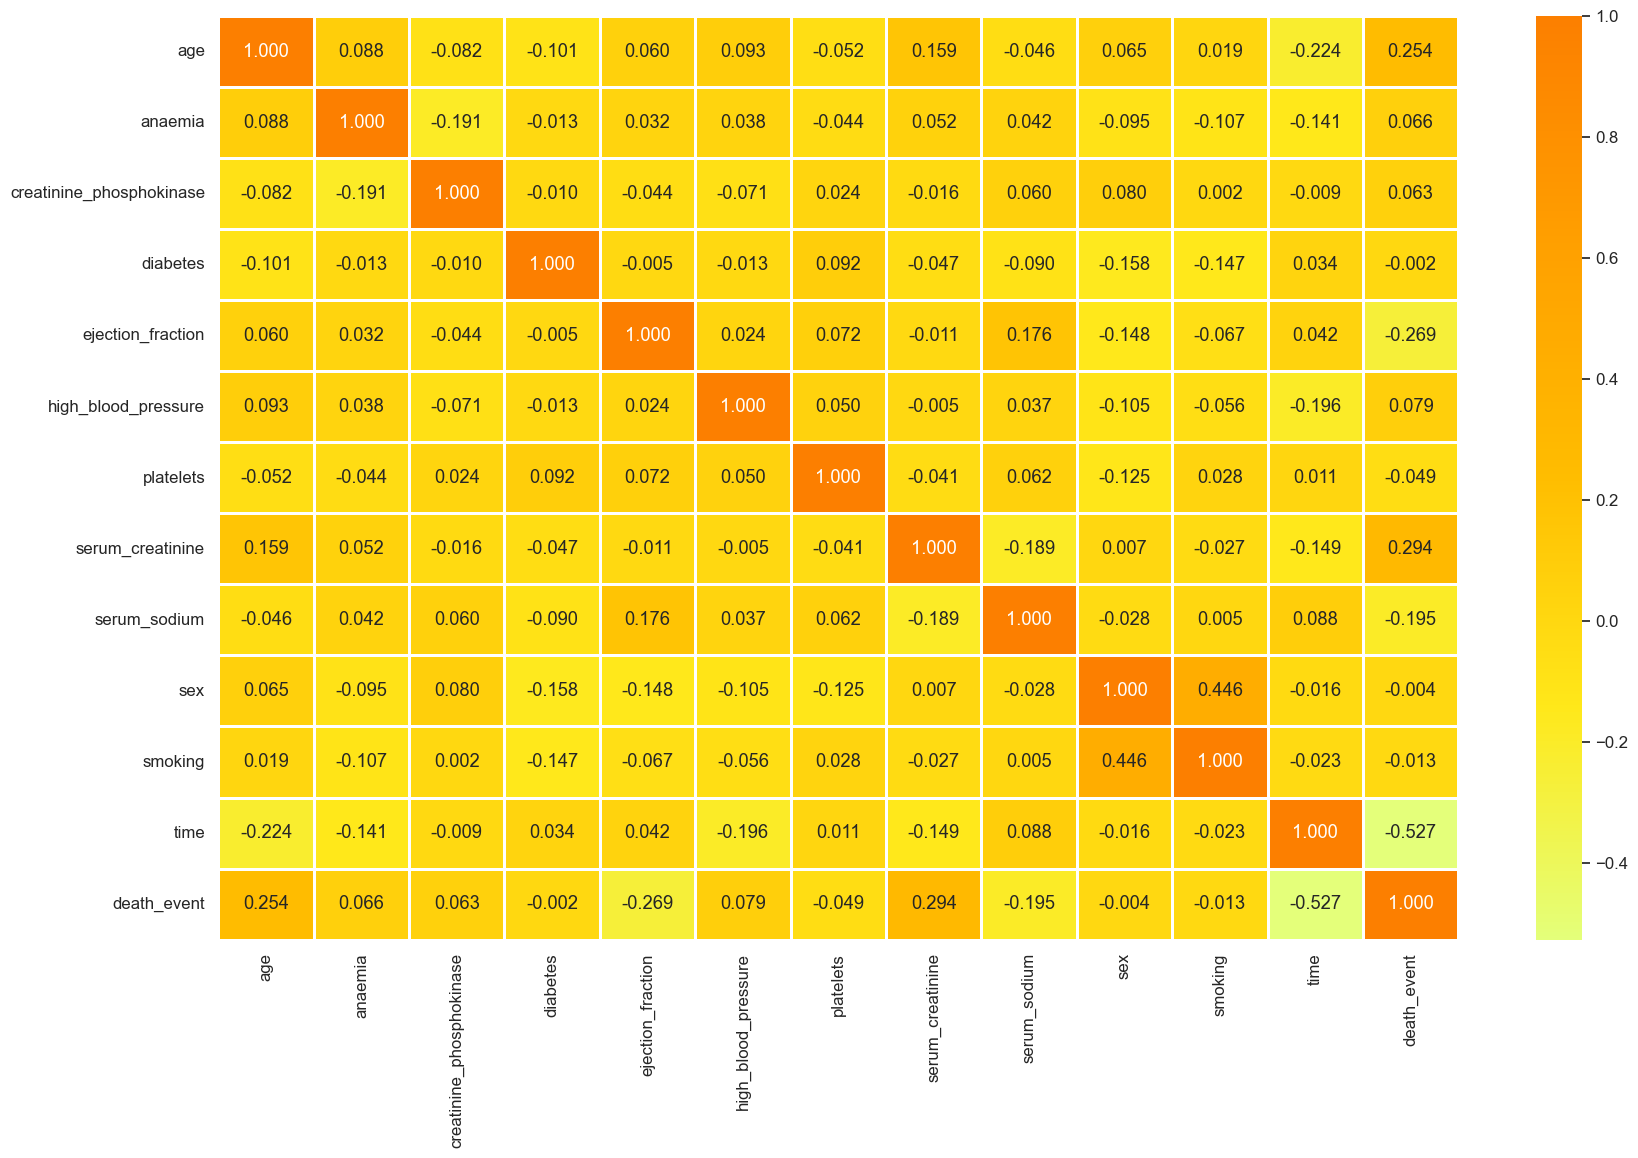

In [ ]:
sns.set(font_scale=1.1)
mask = np.triu(cleaned_df.corr())

plt.figure(figsize=(20, 12))
sns.heatmap(cleaned_df.corr(),
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

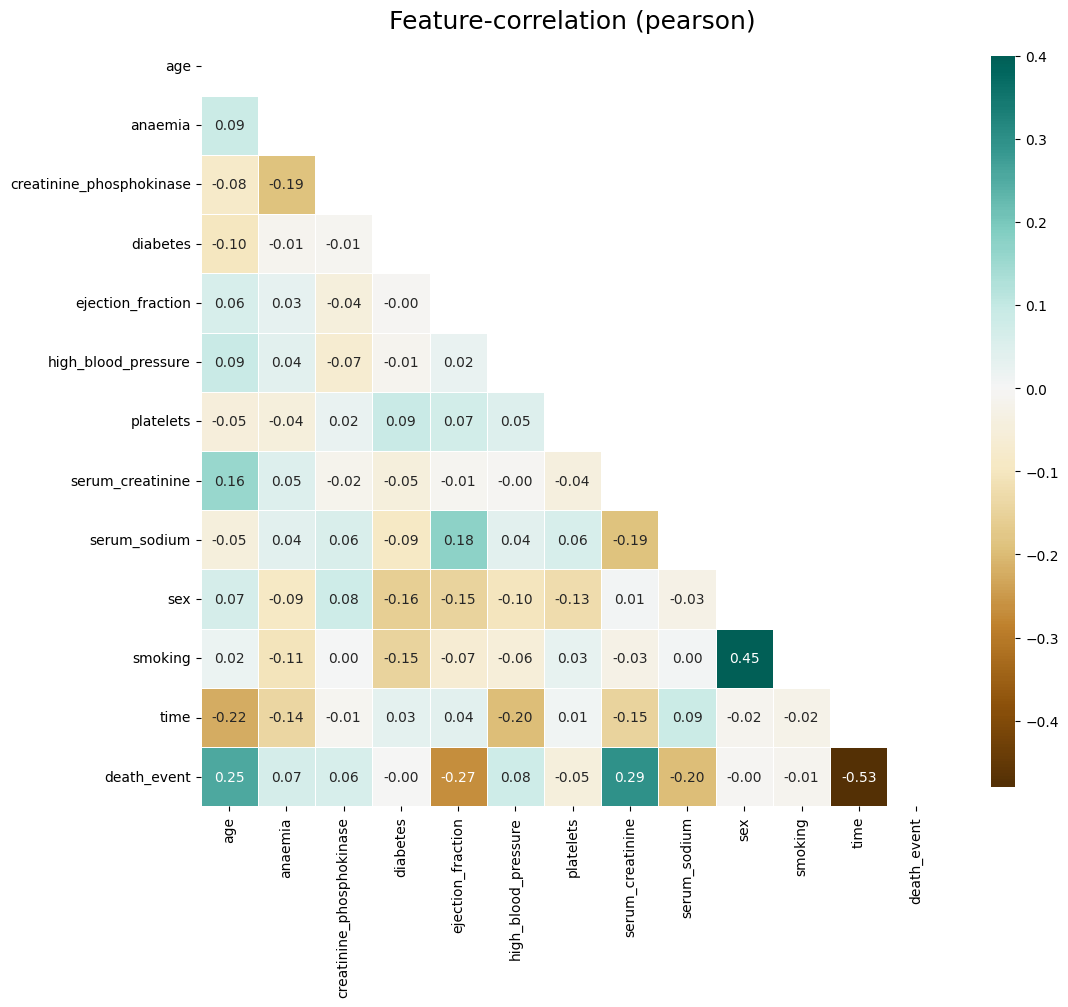

In [ ]:
# Correlation plot
klib.corr_plot(cleaned_df, annot = True)

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

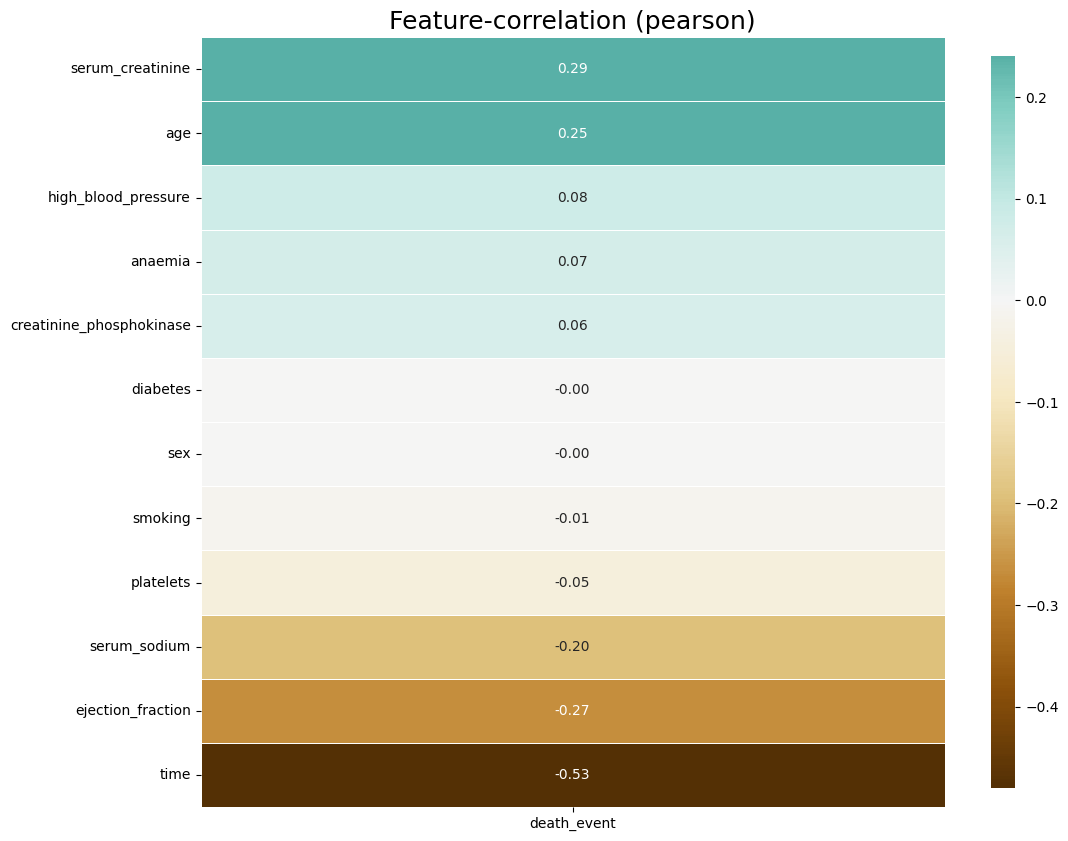

In [ ]:
# Display correlation with a target variable of interest (death_event)

klib.corr_plot(cleaned_df, target = "death_event")

[0.14043129 0.02956382 0.10808215 0.04294922 0.17970729 0.03083451
 0.10718005 0.1657336  0.12484629 0.03317577 0.03749601]


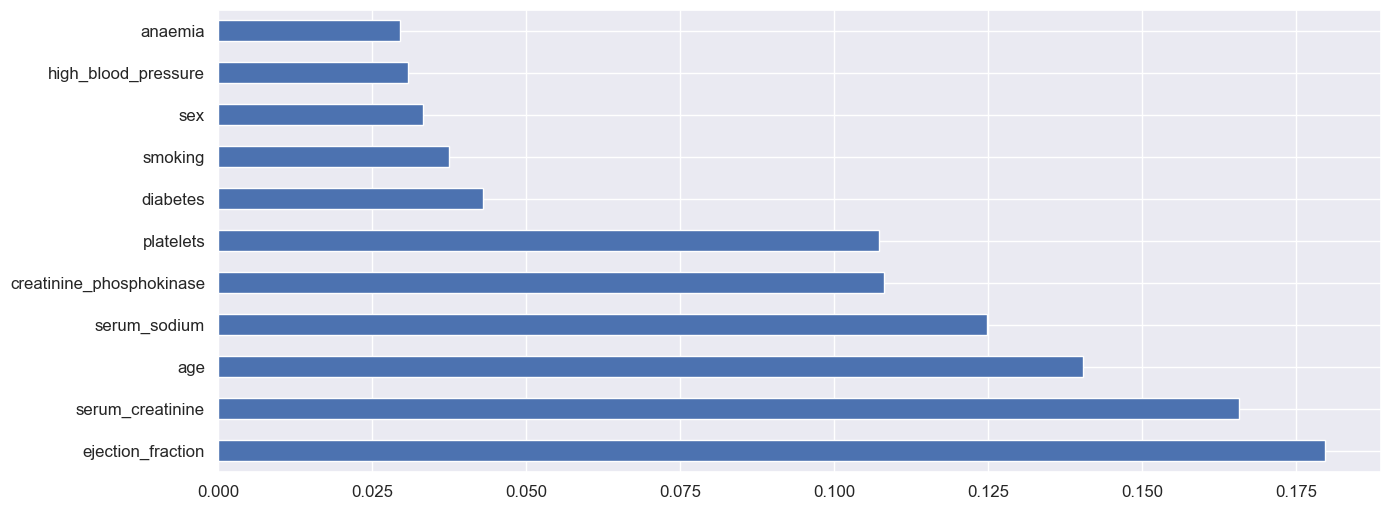

In [ ]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

from sklearn.ensemble import ExtraTreesClassifier

X = df.drop(columns = ['DEATH_EVENT', 'time']) 
# dropping time variable as it has revercal causal relationship with death events
y = df['DEATH_EVENT']

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()
# showed that time, ejection fraction, serum creatinine & age has the highest correlation to death_event

In [ ]:
cleaned_df.groupby(['death_event','age','ejection_fraction','serum_creatinine']).mean()
# 

anaemia  \
death_event age   ejection_fraction serum_creatinine            
0           40.00 30                0.90                 0.00   
                  35                0.90                 1.00   
                                    1.00                 0.00   
                                    1.10                 0.00   
                  40                0.80                 1.00   
...                                                       ...   
1           90.00 40                2.10                 1.00   
                  50                1.00                 1.00   
            94.00 38                1.83                 0.00   
            95.00 30                2.00                 1.00   
                  40                1.00                 1.00   

                                                      creatinine_phosphokinase  \
death_event age   ejection_fraction serum_creatinine                             
0           40.00 30                0.90                                478.00   
                  35                0.90                                129.00   
                                    1.00                                603.00   
                                    1.10                                 90.00   
                  40                0.80                                101.00   
...                                                                        ...   
1           90.00 40                2.10                                 47.00   
                  50                1.00                                 60.00   
            94.00 38                1.83                                582.00   
            95.00 30                2.00                                371.00   
                  40                1.00                                112.00   

                                                      diabetes  \
death_event age   ejection_fraction serum_creatinine             
0           40.00 30                0.90                  1.00   
                  35                0.90                  0.00   
                                    1.00                  0.50   
                                    1.10                  0.00   
                  40                0.80                  0.00   
...                                                        ...   
1           90.00 40                2.10                  0.00   
                  50                1.00                  1.00   
            94.00 38                1.83                  1.00   
            95.00 30                2.00                  0.00   
                  40                1.00                  0.00   

                                                      high_blood_pressure  \
death_event age   ejection_fraction serum_creatinine                        
0           40.00 30                0.90                             0.00   
                  35                0.90                             0.00   
                                    1.00                             0.00   
                                    1.10                             0.00   
                  40                0.80                             0.00   
...                                                                   ...   
1           90.00 40                2.10                             1.00   
                  50                1.00                             0.00   
            94.00 38                1.83                             1.00   
            95.00 30                2.00                             0.00   
                  40                1.00                             1.00   

                                                      platelets  serum_sodium  \
death_event age   ejection_fraction serum_creatinine                            
0           40.00 30                0.90              303000.00        136.00   
                  35                0

In [ ]:
cleaned_df.columns.values

array(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'], dtype=object)

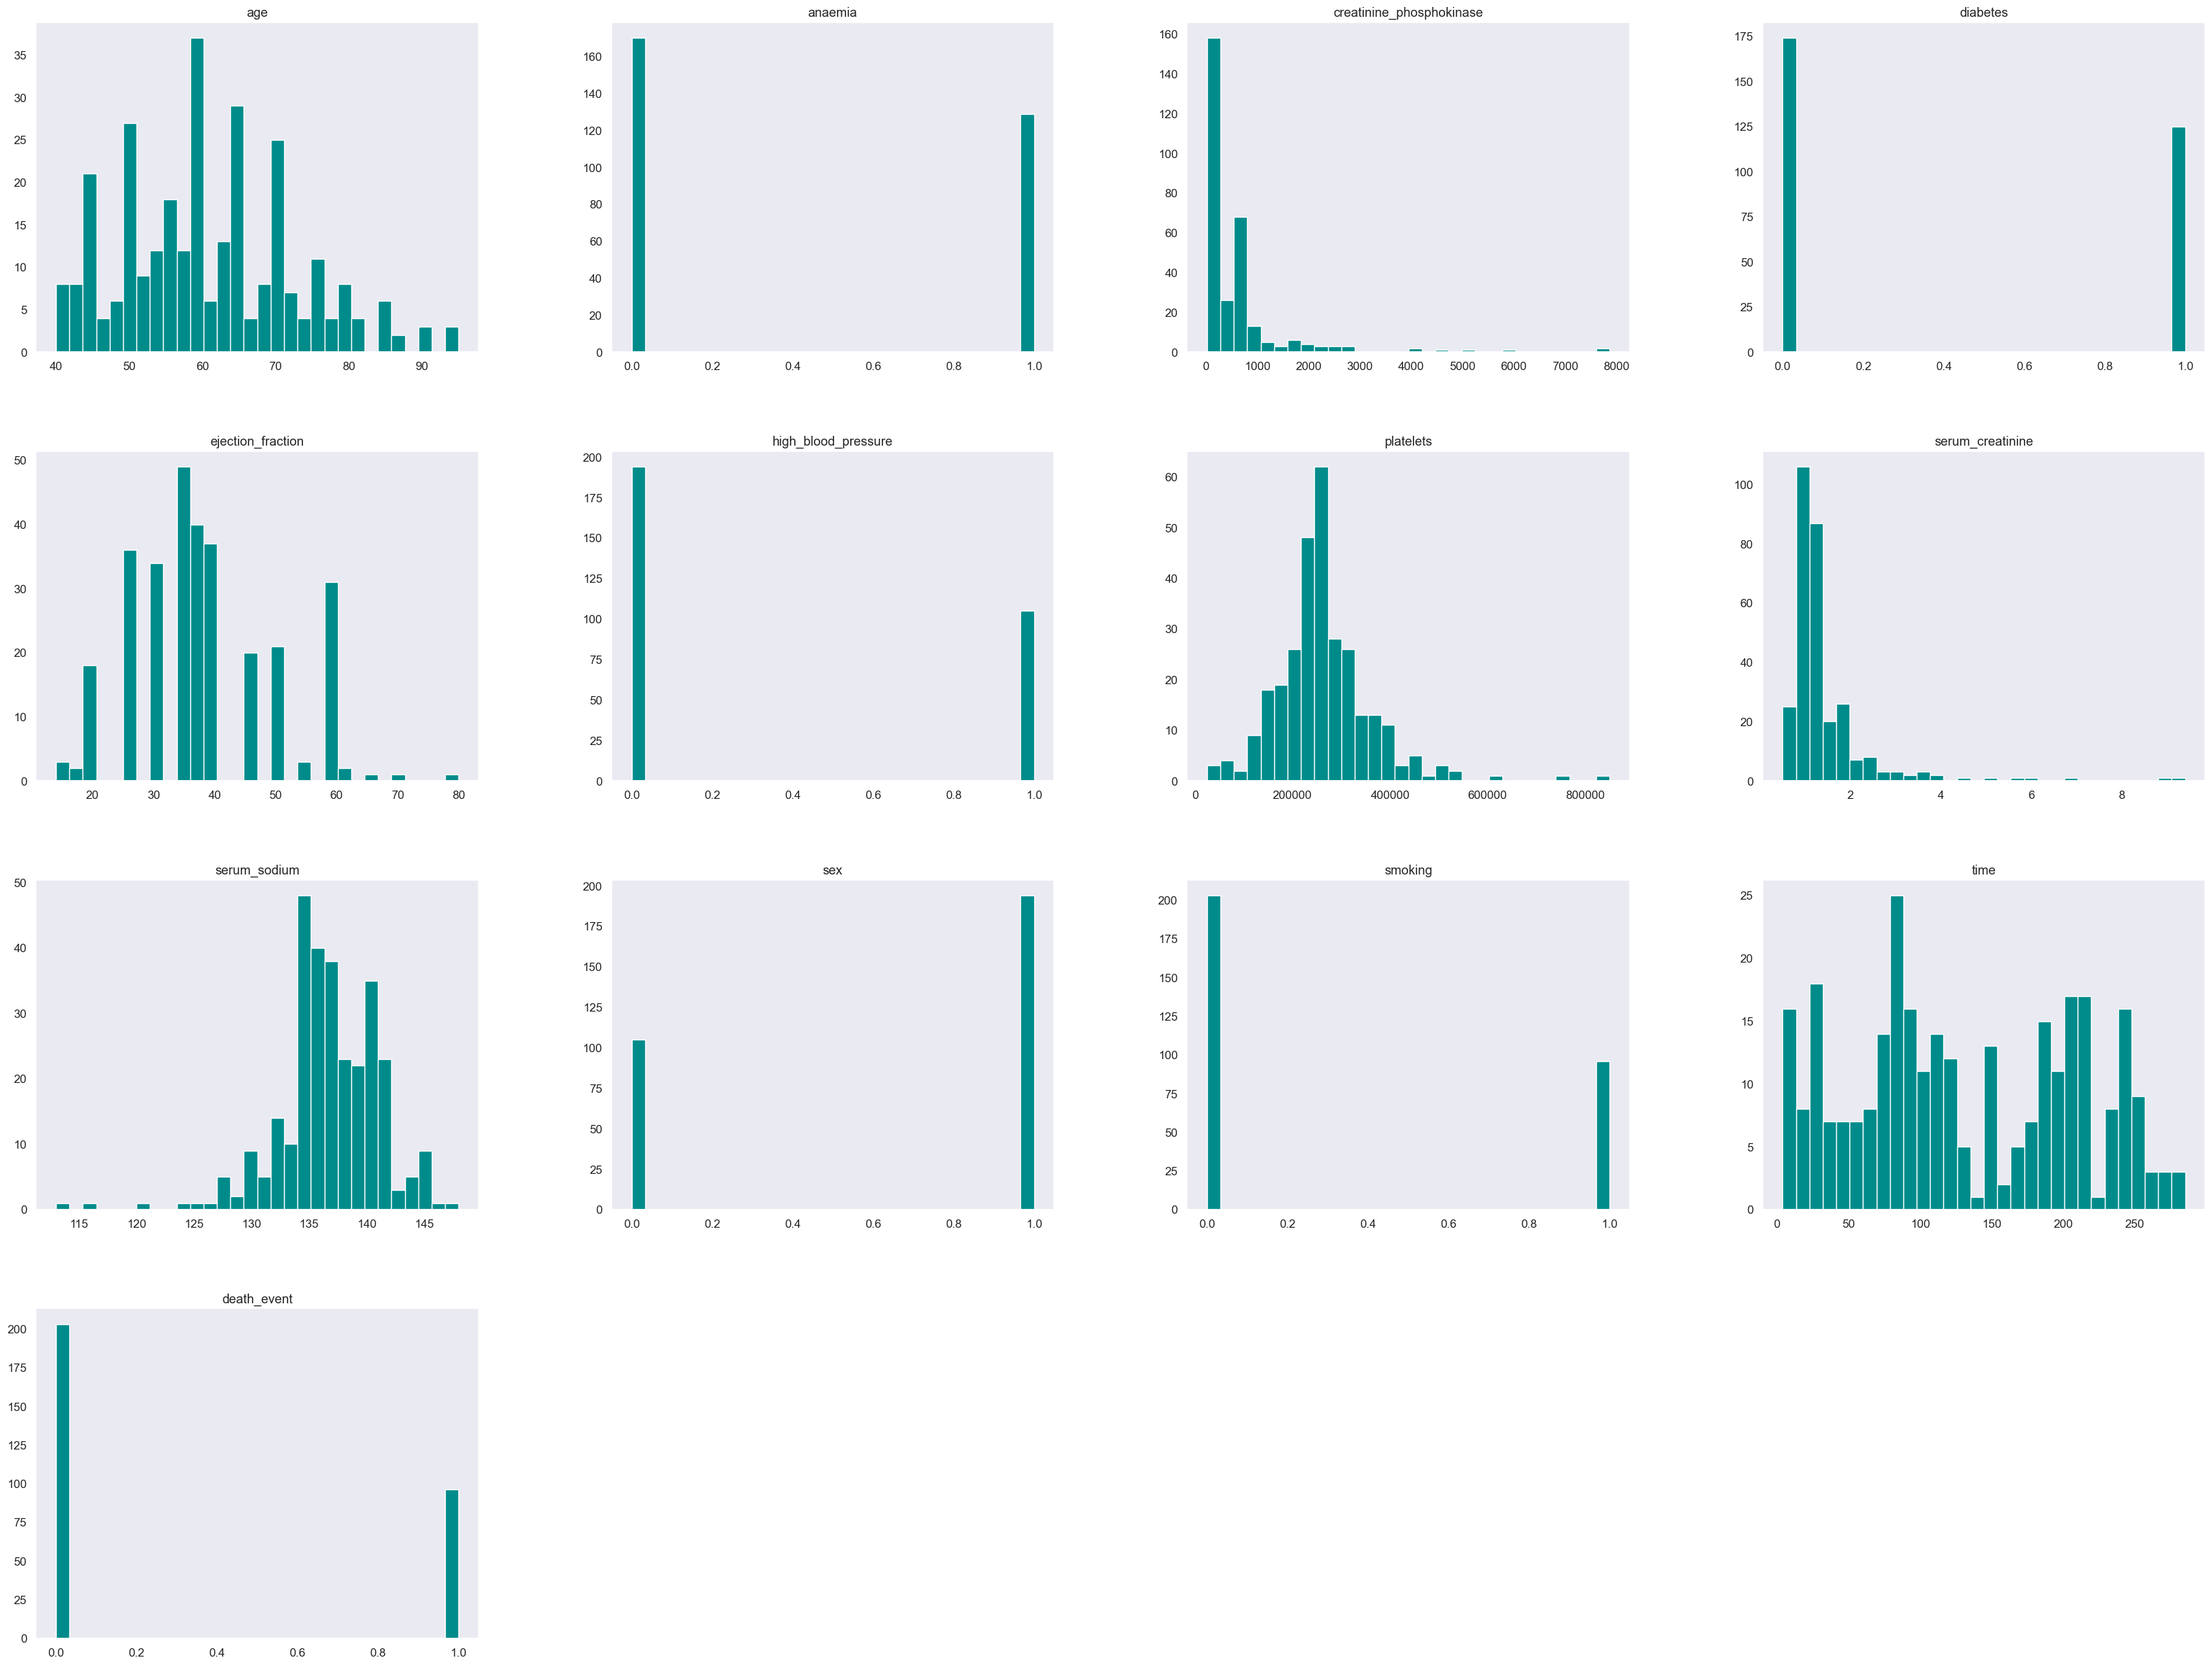

In [ ]:
cleaned_df.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = cleaned_df.columns[0:], color= "DarkCyan", grid = False)
plt.show()

In [ ]:
X_train,X_test,y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

hyper_parameters = {'batch_size':['auto',100], 'max_iter':[200,500],'hidden_layer_sizes':[5,(5,5,5)],
                    'learning_rate_init': [0.05,0.01,0.001,0.005]}


gs  =GridSearchCV(MLPClassifier(),hyper_parameters,scoring='roc_auc',n_jobs=-1
                  ,return_train_score=False,verbose=0,cv=5)

clf =gs.fit(X_train, y_train)
print('The best combination is:')
print(clf.best_params_)

print('The best Accuracy is:')
print(clf.best_score_)

The best combination is:
{'batch_size': 100, 'hidden_layer_sizes': 5, 'learning_rate_init': 0.005, 'max_iter': 200}
The best Accuracy is:
0.7472408963585434


In [ ]:
Final_Model=clf.best_estimator_
y_predicted =Final_Model.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

,Y_test,Y_predicted
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0
278,0,0
93,1,1
109,0,0


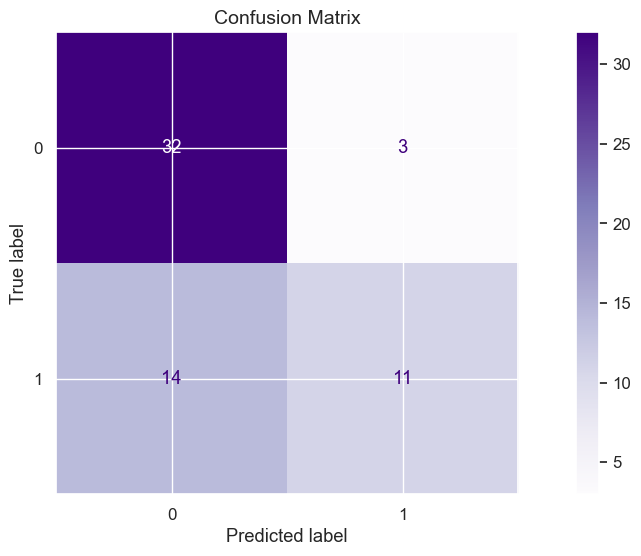

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

plot_confusion_matrix(Final_Model, X_test, y_test,cmap='Purples')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score

In [ ]:
print(f'\t\tMLP Model has A:- \n\nAccuracy: {accuracy_score(y_test,y_predicted).round(4)}\t\trecall_Score: {recall_score(y_test,y_predicted).round(4)}\nPrecision_score: {precision_score(y_test,y_predicted).round(4)}\t\tF1-score equals: {f1_score(y_test,y_predicted).round(4)}')

		MLP Model has A:- 

Accuracy: 0.7167		recall_Score: 0.44
Precision_score: 0.7857		F1-score equals: 0.5641


In [ ]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow.python'

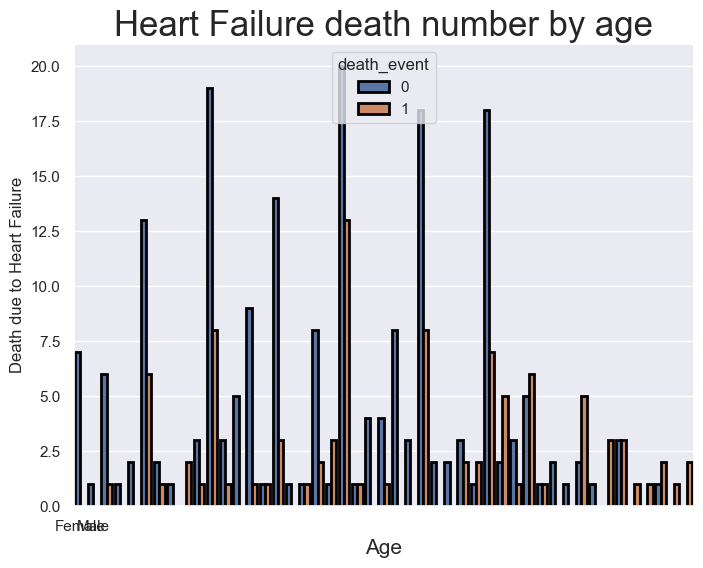

In [ ]:
# Bar plot to see relation between  & death_event number

sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='age', data = cleaned_df, hue='death_event', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Heart Failure death number by age', fontsize=25)
plt.xlabel('Age', fontsize=15)
plt.ylabel("Death due to Heart Failure", fontsize = 12)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(cleaned_df.death_event.unique()),labels);